<a href="https://colab.research.google.com/github/ClaudioAresu/TensorFlow/blob/main/03multclass_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [55]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Test sample: \n{test_data[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [56]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

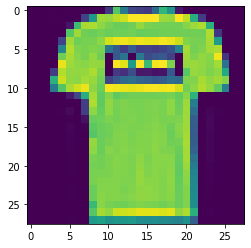

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[1]) ;

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot",]

In [6]:
len(class_names)

10

In [7]:
import numpy as np
import random

In [8]:
index_of_choice = 2000
index_of_choice

2000

Text(0.5, 1.0, 'Coat')

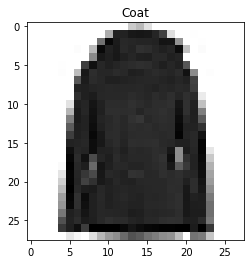

In [9]:
#plot an example image

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [10]:
tf.size(train_data)

<tf.Tensor: shape=(), dtype=int32, numpy=47040000>

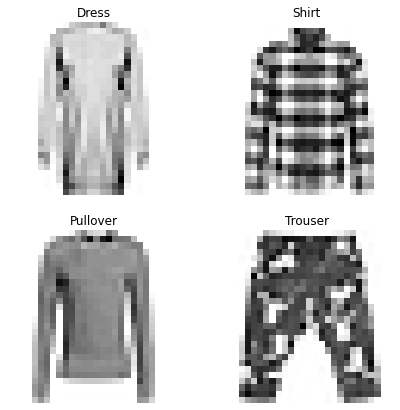

In [11]:
#Plot multiple random images of fashion MNIST
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt. subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

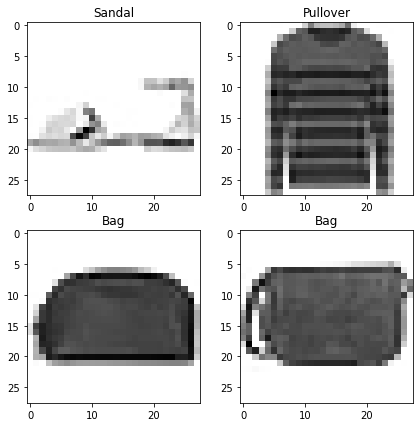

In [12]:
#Plot multiple random images of fashion MNIST
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt. subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

1. Input Shape = 28x 28 (image shape)
2. Output shape = 10 (one per class of clothing
3. Loss function = categorical_crossentropy
  If your labels are Integer use sparse_categorical_crossentropy
4. Output layer activation = Softmax



In [13]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [14]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss="sparse_categorical_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])


non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3206 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3031 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy:

In [15]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Check the min and max values of the training data

train_data.min(), train_data.max()

(0, 255)

# Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the  test and train data between 0 and 1.

# We can get our training and testing data between 0 & 1 by dividing by the maximum 

In [58]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#check the min and max values of the scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [34]:
tf.random.set_seed(42)

model_12 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

norm_history =  model_12.fit(train_data_norm,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7361 - accuracy: 0.3021 - val_loss: 66.4531 - val_accuracy: 0.3315
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1872 - accuracy: 0.5416 - val_loss: 130.8710 - val_accuracy: 0.4469
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9763 - accuracy: 0.6494 - val_loss: 157.2359 - val_accuracy: 0.5011
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8715 - accuracy: 0.6867 - val_loss: 172.9448 - val_accuracy: 0.5250
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8180 - accuracy: 0.7045 - val_loss: 169.5376 - val_accuracy: 0.5505
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7868 - accuracy: 0.7160 - val_loss: 171.7493 - val_accuracy: 0.5639
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7661 - accuracy: 0.7258 - val_loss: 176.4090 - 

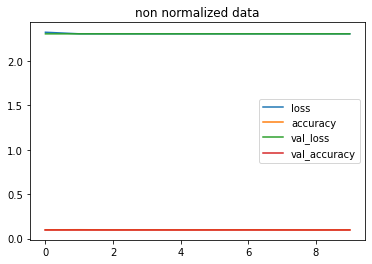

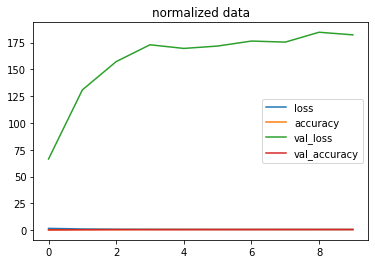

In [59]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="non normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

#The same model with even slightly different data cab produce dramatically different results. So when you're comparing models, it's importatnt to make sure you're comparing them on the same criteria (e.g. same architecture but different data)

In [60]:
train_data_norm.dtype

dtype('float64')

# Finding the ideal learning rate

In [62]:
from keras.optimizers.optimizer_v2.nadam import learning_rate_schedule
from keras.callbacks import LearningRateScheduler
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data = (test_data_norm,test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7345 - accuracy: 0.7412 - val_loss: 0.5374 - val_accuracy: 0.8089 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4946 - accuracy: 0.8281 - val_loss: 0.5340 - val_accuracy: 0.8091 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4662 - accuracy: 0.8379 - val_loss: 0.5087 - val_accuracy: 0.8183 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4482 - accuracy: 0.8439 - val_loss: 0.4902 - val_accuracy: 0.8272 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4387 - accuracy: 0.8456 - val_loss: 0.5019 - val_accuracy: 0.8219 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4299 - accuracy: 0.8484 - val_loss: 0.4744 - val_accuracy: 0.8350 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal Lr')

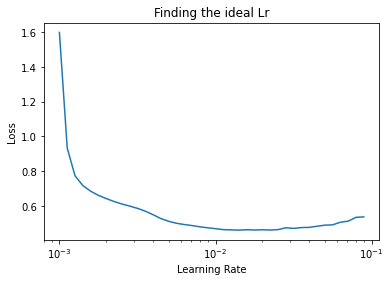

In [61]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Lr")

In [65]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14  = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1790 - accuracy: 0.5313 - val_loss: 0.7518 - val_accuracy: 0.7135
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6895 - accuracy: 0.7413 - val_loss: 0.6703 - val_accuracy: 0.7560
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5992 - accuracy: 0.7917 - val_loss: 0.6045 - val_accuracy: 0.7864
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5561 - accuracy: 0.8069 - val_loss: 0.5798 - val_accuracy: 0.7964
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5372 - accuracy: 0.8120 - val_loss: 0.5612 - val_accuracy: 0.8009
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5265 - accuracy: 0.8146 - val_loss: 0.5528 - val_accuracy: 0.8056
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.8177 - val_loss: 0.5745 - val_accuracy:

## Evaluating our multi-calss classification model

To evaluate our multi-class cl;assification model we could:
* Evaluate its performance using other classification metrics (such as cm)
* Asses some of its predictions (through visualizations)
* Improve the results(by training it for longer or changing the architecture)
* Save and export it for use in an application

In [67]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  #Create confusion matrix and change de datatype of the predictions
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]


  #Plot the colorbar
  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Plot the Confusion Matrix
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Titles and subtitles size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  #Set the range of the ground truth and predictions across the matrix
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment= "center",
    color="white" if cm[i, j] > threshold else "black",
    size=text_size)

In [47]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [68]:
#Make predictions with our model
y_probs = model_14.predict(test_data_norm)

#View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 955us/step


array([[1.1574010e-08, 8.0823391e-08, 6.1996548e-07, 9.2797887e-07,
        1.6572042e-09, 1.6551165e-01, 7.6302529e-09, 4.7786765e-02,
        2.5945000e-04, 7.8644049e-01],
       [2.2418390e-05, 1.5697426e-08, 9.5634693e-01, 7.7954802e-08,
        5.8197808e-03, 1.7505146e-10, 3.7475772e-02, 3.6913483e-33,
        3.3489597e-04, 1.9099667e-35],
       [2.0176216e-07, 9.9863487e-01, 1.2351455e-04, 5.0341501e-04,
        7.1436452e-04, 1.8024537e-06, 3.9727097e-06, 2.9956121e-11,
        1.5063863e-05, 2.7718145e-06],
       [1.6914138e-08, 9.9928194e-01, 3.5599172e-05, 3.5437386e-04,
        3.1006787e-04, 4.9278094e-07, 6.2505438e-07, 7.5700297e-12,
        1.2394449e-05, 4.4919998e-06],
       [1.8571569e-01, 1.0016165e-04, 2.0473993e-01, 8.7880967e-03,
        3.3814006e-02, 7.3661334e-07, 5.6138837e-01, 3.3533558e-15,
        5.4529598e-03, 9.0265919e-19]], dtype=float32)

**IMPORTANT**❗ Got strange values because I first normalized the data in the test_data variable, and then with the test data already normalized, created a test_data_norm trying to normalize it a second time, thus the incredible losses in the validation data and distorted graphs**

In [85]:
x = tf.constant([[2,6,5],
                 [3,5,8]])

x, tf.argmax(x[1])

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[2, 6, 5],
        [3, 5, 8]], dtype=int32)>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)

In [70]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.1574010e-08, 8.0823391e-08, 6.1996548e-07, 9.2797887e-07,
        1.6572042e-09, 1.6551165e-01, 7.6302529e-09, 4.7786765e-02,
        2.5945000e-04, 7.8644049e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [71]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [72]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[749,   7,  18,  67,   4,   4, 140,   0,  11,   0],
       [  1, 960,  10,  20,   7,   0,   1,   0,   1,   0],
       [ 10,  12, 731,  16, 140,   0,  76,   0,  15,   0],
       [ 33,  20,   6, 854,  34,   1,  38,   2,  11,   1],
       [  2,  13, 116,  37, 756,   1,  71,   0,   4,   0],
       [  2,   0,   1,   0,   0, 910,   0,  40,  10,  37],
       [160,   8, 155,  55, 139,   4, 462,   1,  16,   0],
       [  0,   0,   0,   0,   0,  48,   0, 894,   0,  58],
       [  8,   1,  23,  16,   1,  10,  23,   4, 914,   0],
       [  1,   0,   0,   0,   0,  21,   0,  44,   0, 934]])

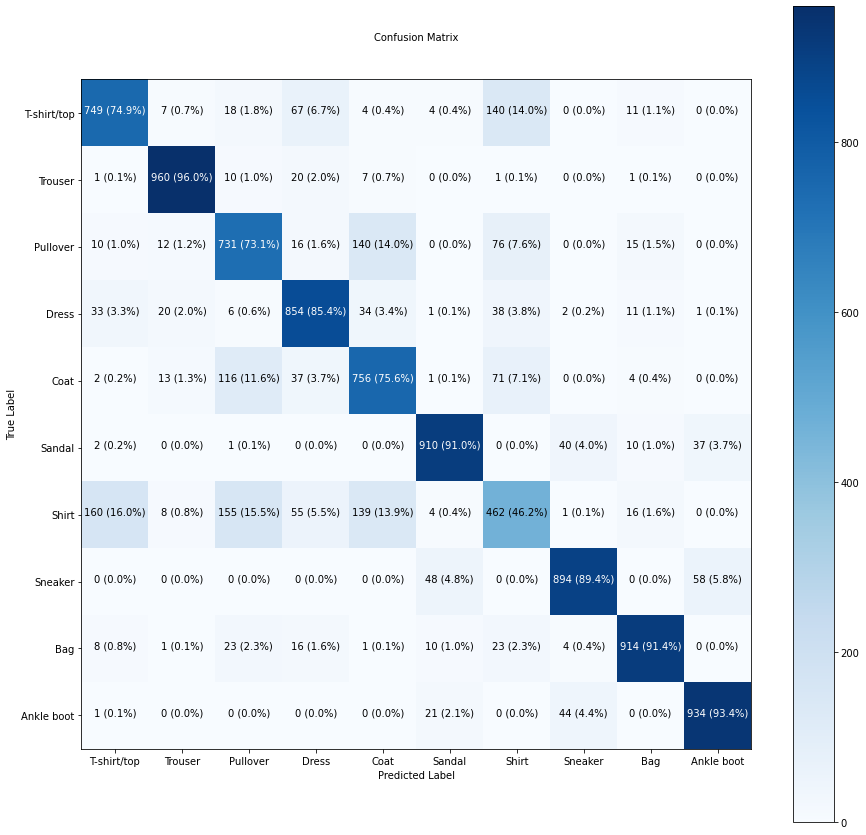

In [78]:
# Make a prettier confusion amtrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15,),
                      text_size=10)

> 🔑**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
  * Plot a random image
  * Make a prediction on said image
  * Label the plot with the truth label & the predicted label

In [91]:
import random

def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)


#Always make predictions on the same kind of data your model was trained on

1/1 [==============================] - 0s 25ms/step


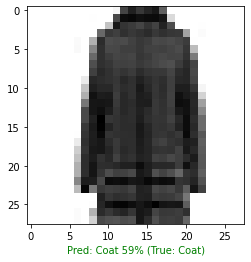

In [96]:
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [98]:
#Find the layers of our most recent model
model_14.layers

In [99]:
#Extract a particular layer
model_14.layers[1]

In [100]:
#Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[ 0.01777919, -0.9002781 ,  0.8407524 ,  0.15017466],
        [ 0.15031949, -0.22732599,  0.03680201, -0.11590143],
        [ 0.65688336, -1.0353438 ,  0.44045833,  0.9606374 ],
        ...,
        [-0.19745646,  0.21026632, -0.01064827,  0.32898647],
        [-0.7110739 , -0.0020783 ,  0.6613294 ,  0.07205327],
        [ 0.1796184 , -0.24418487, -0.28112552,  0.1372981 ]],
       dtype=float32), (784, 4))

In [101]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 4)                 3140      
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [102]:
biases, biases.shape

(array([1.3512177 , 1.2059126 , 0.20184804, 1.2855834 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights amtrix.

the bias vector initializes as zeros ( at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weight matrix should influence the next layer

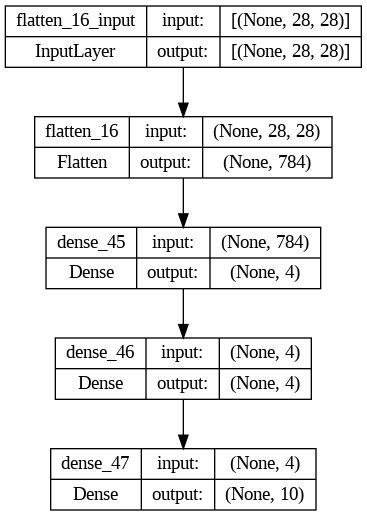

In [104]:
#Let's check out another way of viewing oour deep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

#Next: check out exercises

In [106]:
from sklearn.datasets import make_moons



In [112]:
n_samples= 20000
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

X, y

(array([[ 0.01554134,  0.26372844],
        [ 0.78909418,  0.59338756],
        [-0.95338436,  0.43871314],
        ...,
        [-0.14047165,  1.03391297],
        [ 0.93413585,  0.21232898],
        [ 1.27276126, -0.51588804]]), array([1, 0, 0, ..., 0, 0, 1]))

In [113]:
X.shape, y.shape

((20000, 2), (20000,))

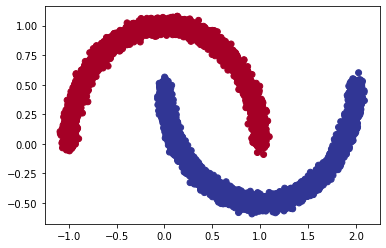

In [120]:
moonsDf = pd.DataFrame(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [121]:
train_data = X[:15000]
train_labels = y[:15000]
test_data = X[15000:]
test_labels = y[15000:]

In [ ]:
#Create training data, labels, test data and labels.

X

In [125]:
tf.random.set_seed(42)

model_homework = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_homework.compile(loss="binary_crossentropy",
                       optimizer="Adam",
                       metrics="accuracy")

lr_scheduler_homework = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_homework = model_homework.fit(train_data, train_labels, epochs=200, validation_data=(test_data, test_labels))

Epoch 1/200
469/469 [==============================] - 3s 2ms/step - loss: 0.4469 - accuracy: 0.8522 - val_loss: 0.2185 - val_accuracy: 0.9736
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.9975 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 8.0305e-04 - accuracy: 1.0000 - val_loss: 5.8282e-04 - val_accuracy: 1.0000
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 4.4147e-04 - accuracy: 1.0000 - val_loss: 3.3826e-04 - val_accuracy: 1.0000
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 2.6735e-04 - accuracy: 1.0000 - val_loss: 2.1820e-0

In [126]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays togheter

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step


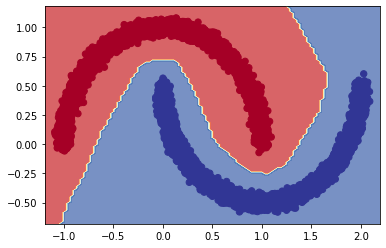

In [127]:
plot_decision_boundary(model=model_homework, X=train_data, y=train_labels)